# WeatherPy

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [93]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls

In [94]:
# URL skeletons
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Print out the city number and city name, pass if not found
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print("City ID: " + str(response['id']) + " | City Name: " + str(response['name']))
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print("City not found. Skipping...")
        pass
        pass
        pass
        pass
        pass
        pass

City ID: 934322 | City Name: Mahébourg
City ID: 1006984 | City Name: East London
City ID: 2037485 | City Name: Erenhot
City ID: 230166 | City Name: Lira
City not found. Skipping...
City ID: 6201424 | City Name: Mataura
City not found. Skipping...
City ID: 1282256 | City Name: Hithadhoo
City ID: 3874787 | City Name: Punta Arenas
City ID: 2160336 | City Name: Leopold
City ID: 2147381 | City Name: Taree
City ID: 2392087 | City Name: Porto-Novo
City ID: 118063 | City Name: Sabzawār
City ID: 5503914 | City Name: Fallon
City ID: 2738381 | City Name: Lata
City ID: 5106841 | City Name: Albany
City ID: 2122090 | City Name: Pevek
City not found. Skipping...
City not found. Skipping...
City ID: 2155415 | City Name: New Norfolk
City ID: 4020109 | City Name: Atuona
City ID: 4036284 | City Name: Alofi
City ID: 1852357 | City Name: Shimoda
City ID: 2075265 | City Name: Busselton
City ID: 6096551 | City Name: Pangnirtung
City ID: 3412093 | City Name: Vestmannaeyjar
City ID: 2137773 | City Name: Vao
Ci

City ID: 986717 | City Name: Kruisfontein
City ID: 1507390 | City Name: Dikson
City ID: 3351024 | City Name: Caluquembe
City ID: 5797693 | City Name: Hoquiam
City ID: 3653967 | City Name: Muisne
City ID: 2021041 | City Name: Kyra
City ID: 3013748 | City Name: Hauterive
City ID: 3932145 | City Name: Pisco
City ID: 1337617 | City Name: Muli
City ID: 3372964 | City Name: Lagoa
City ID: 108410 | City Name: Riyadh
City not found. Skipping...
City ID: 2171099 | City Name: Codrington
City ID: 3374351 | City Name: Pombas
City ID: 3443061 | City Name: Chui
City ID: 1855540 | City Name: Naze
City ID: 2088122 | City Name: Port Moresby
City ID: 2136825 | City Name: Isangel
City ID: 4031574 | City Name: Provideniya
City ID: 2226275 | City Name: Mokolo
City ID: 157107 | City Name: Kirando
City ID: 3374462 | City Name: Mindelo
City not found. Skipping...
City ID: 1520381 | City Name: Ordzhonīkīdze
City ID: 57000 | City Name: Hobyo
City ID: 1037125 | City Name: Montepuez
City ID: 1651810 | City Name: 

City ID: 5244638 | City Name: Baraboo
City ID: 1806687 | City Name: Yong’an
City ID: 1261205 | City Name: Nongstoin
City ID: 3356832 | City Name: Henties Bay
City ID: 5768244 | City Name: Rapid Valley
City ID: 609404 | City Name: Khromtau
City ID: 1528998 | City Name: Yumen
City not found. Skipping...
City ID: 1337607 | City Name: Kudahuvadhoo
City ID: 5861897 | City Name: Fairbanks
City ID: 4021858 | City Name: Guerrero Negro
City ID: 2449893 | City Name: Tessalit
City ID: 1791388 | City Name: Wenzhou
City ID: 2128975 | City Name: Nemuro
City ID: 1863495 | City Name: Gushikawa
City ID: 148442 | City Name: Astara
City ID: 1260003 | City Name: Pawāyan
City ID: 609906 | City Name: Fort-Shevchenko
City ID: 286621 | City Name: Salalah
City ID: 1280037 | City Name: Shache
City ID: 2101169 | City Name: Aitape
City ID: 2134814 | City Name: Sola
City ID: 2015217 | City Name: Tokur
City ID: 648090 | City Name: Lieksa
City ID: 3573374 | City Name: The Valley
City ID: 5746545 | City Name: Portlan

In [95]:
# Create a data frame from API of necessary columns
weather_dict = {
    "City": cities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

# Create a DataFrame from the dictonary, orient on the index
# to avoid difference in array length error - as some values are null
df = pd.DataFrame.from_dict(weather_dict, orient='index')

# Flip the index back to a column
df = df.transpose()

# Drop NAs
df = df.dropna()

# Make sure the dataset is still > 500 entries
len(df)

575

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [96]:
# Output DataFrame to csv in output_data
df.to_csv("output_data/cities_output.csv")

df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-35.809229,71.77933,73.26,74,16,9.53,MU,1654628470
1,east london,-56.50289,47.439327,64.38,60,18,6.13,ZA,1654628544
2,erenhot,43.676734,111.15875,60.42,32,7,8.46,CN,1654628544
3,lira,2.736162,33.08628,65.39,93,100,4.59,UG,1654628544
4,illoqqortoormiut,70.13368,-21.673351,46.47,95,5,3.27,NZ,1654628544


## Latitude vs. Temperature Plot

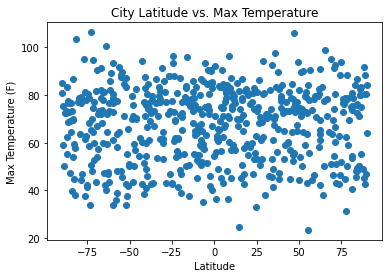

In [105]:
plt.scatter(df['Lat'], df['Max Temp']);
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');

plt.savefig("output_data/CityLatitudevsMaxTemperature.png")

The plot aboove depicts the city latitude (relative distance north or south of the equator). One would expect a clustering of high temperature datapoints in the center of the x-axis, because, generally speaking, temperature goes up the closer you are to the equator. However, since these cities were randomly selected.

## Latitude vs. Humidity Plot

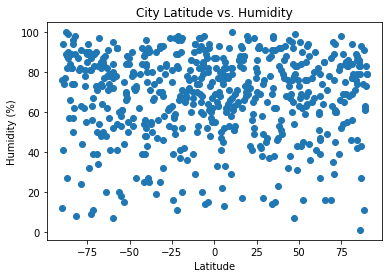

In [106]:
plt.scatter(df['Lat'], df['Humidity']);
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');

plt.savefig("output_data/CityLatitudevsHumidity.png")

The plot above shows us the relationship between city latitude and humidity. Humidity is a measure of the density of water in the air. Theoretically, latitude does not correlate with humidity (there are arid and humid climates around the globe). These randomly selected cities seem to in mostly be humid areas.

## Latitude vs. Cloudiness Plot

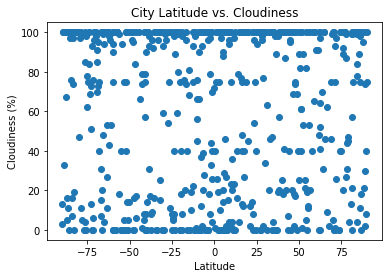

In [107]:
plt.scatter(df['Lat'], df['Cloudiness']);
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');

plt.savefig("output_data/CityLatitudevsCloudiness.png")

This plot illustrates latitude versus cloud coverage. Distance from the equator shouldn't have much to do with cloud coverage; it does seem as though the cities are clustered at extremes in this plot (100% coverage or 0%).

## Latitude vs. Wind Speed Plot

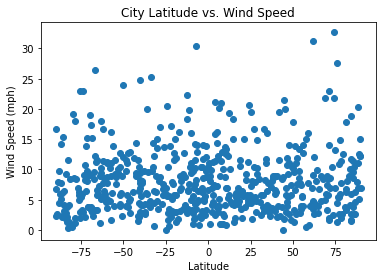

In [108]:
plt.scatter(df['Lat'], df['Wind Speed']);
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');

plt.savefig("output_data/CityLatitudevsWindSpeed.png")

The latitude verus wind speed plot shows us that regardless of latitude, a majority of the cities' wind speeds are clustered between 0 and 12.5mph. There are a few outliers, but again, this is not related to latitude.

## Linear Regression

In [126]:
# Split the dataset into above and below the equator

north_df = df[df.Lat >= 0]

south_df = df[df.Lat < 0]

# Convert column datatypes to accomodate calculations
north_df['Lat'] = north_df['Lat'].astype('float64')
north_df['Max Temp'] = north_df['Max Temp'].astype('float64')
north_df['Humidity'] = north_df['Humidity'].astype('float64')
north_df['Cloudiness'] = north_df['Cloudiness'].astype('float64')
north_df['Wind Speed'] = north_df['Wind Speed'].astype('float64')

south_df['Lat'] = south_df['Lat'].astype('float64')
south_df['Max Temp'] = south_df['Max Temp'].astype('float64')
south_df['Humidity'] = south_df['Humidity'].astype('float64')
south_df['Cloudiness'] = south_df['Cloudiness'].astype('float64')
south_df['Wind Speed'] = south_df['Wind Speed'].astype('float64')

C:\Users\bryantim\AppData\Local\Temp\ipykernel_11608\3421505153.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_df['Lat'] = north_df['Lat'].astype('float64')
C:\Users\bryantim\AppData\Local\Temp\ipykernel_11608\3421505153.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_df['Max Temp'] = north_df['Max Temp'].astype('float64')
C:\Users\bryantim\AppData\Local\Temp\ipykernel_11608\3421505153.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.020690175580660813


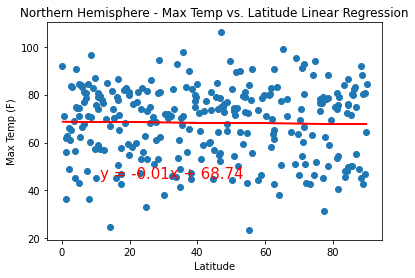

In [133]:
# Get the correlation coefficient for this relationship
r_north_lat_max_temp = north_df['Lat'].corr(north_df['Max Temp'])

# Annotate plot w/ linear regression
x_values = north_df['Lat']
y_values = north_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the relationship
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Max Temp (F)');


print(f"The r value is: {r_north_lat_max_temp}")
plt.savefig("output_data/NorthMaxTempvsLatitudeRegression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.026630404482191988


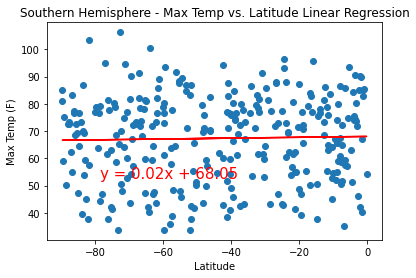

In [134]:
# Get the correlation coefficient for this relationship
r_south_lat_max_temp = south_df['Lat'].corr(south_df['Max Temp'])

# Annotate plot w/ linear regression
x_values = south_df['Lat']
y_values = south_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the relationship
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Max Temp (F)');


print(f"The r value is: {r_south_lat_max_temp}")
plt.savefig("output_data/SouthMaxTempvsLatitudeRegression.png")

The two charts above illustrate the relationship between max temperature and latitude in our randomly selected cities. We'd naturally expect as we approach 0 latitude (equator) that the max temp would be higher. That would mean a downward sloping line for the Northern Hemisphere and an upward sloping line for the Southern Hemisphere. However, the randomly selected cities don't show this relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.01554783634589294


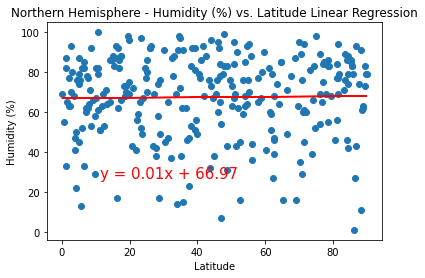

In [135]:
# Get the correlation coefficient for this relationship
r_north_lat_humidity = north_df['Lat'].corr(north_df['Humidity'])

# Annotate plot w/ linear regression
x_values = north_df['Lat']
y_values = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the relationship
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');


print(f"The r value is: {r_north_lat_humidity}")
plt.savefig("output_data/NorthHumidityvsLatitudeRegression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.022207108361545026


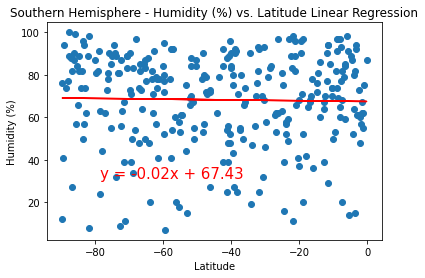

In [136]:
# Get the correlation coefficient for this relationship
r_south_lat_humidity = south_df['Lat'].corr(south_df['Humidity'])

# Annotate plot w/ linear regression
x_values = south_df['Lat']
y_values = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the relationship
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');


print(f"The r value is: {r_south_lat_humidity}")
plt.savefig("output_data/SouthHumidityvsLatitudeRegression.png")

These two plots show humidity vs latitude for the Northern and Southern Hemispheres. There's no obvious relationships in these charts which isn't surprising - there's deserts and wet climates regardless of distance from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.06752283457616776


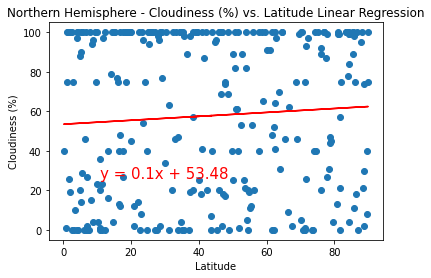

In [137]:
# Get the correlation coefficient for this relationship
r_north_lat_cloudiness = north_df['Lat'].corr(north_df['Cloudiness'])

# Annotate plot w/ linear regression
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the relationship
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');


print(f"The r value is: {r_north_lat_cloudiness}")
plt.savefig("output_data/NorthCloudinessvsLatitudeRegression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.08230113567484504


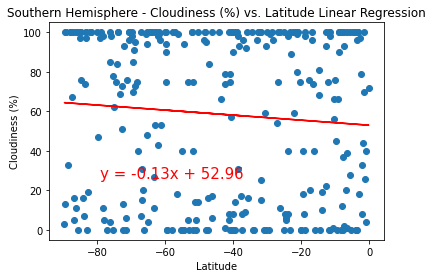

In [138]:
# Get the correlation coefficient for this relationship
r_south_lat_cloudiness = south_df['Lat'].corr(south_df['Cloudiness'])

# Annotate plot w/ linear regression
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the relationship
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');


print(f"The r value is: {r_south_lat_cloudiness}")
plt.savefig("output_data/SouthCloudinesspvsLatitudeRegression.png")

The previous two plots show us Northern and Southern Hemispheres relationships between latitude and cloudiness. Almost no correlation between these two factors it appears.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.04413993969963462


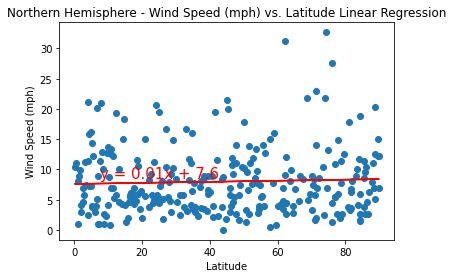

In [139]:
# Get the correlation coefficient for this relationship
r_north_lat_wind_speed = north_df['Lat'].corr(north_df['Wind Speed'])

# Annotate plot w/ linear regression
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the relationship
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');


print(f"The r value is: {r_north_lat_wind_speed}")
plt.savefig("output_data/NorthWindSpeedvsLatitudeRegression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.031034576486290717


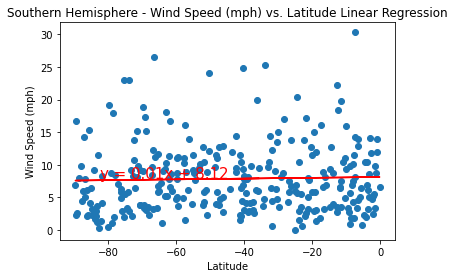

In [140]:
# Get the correlation coefficient for this relationship
r_south_lat_wind_speed = south_df['Lat'].corr(south_df['Wind Speed'])

# Annotate plot w/ linear regression
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the relationship
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(100, 100),xycoords='figure points',fontsize=15,color="red");
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');


print(f"The r value is: {r_south_lat_wind_speed}")
plt.savefig("output_data/SouthWindSpeedvsLatitudeRegression.png")

The wind speed versus latitude in the Northern and Southern hemispheres don't show any correlation. The lines are virtually flat for both halves of the Earth and the R values are nearly 0.